In [124]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
pred_X = df_test.drop(['Id'], axis=1)

In [125]:
def get_notnull_count(df):
    notnull_count = df.count()
    notnull_count = notnull_count[notnull_count > 0]
    return notnull_count


notnull_count = get_notnull_count(df)
notnull_count = notnull_count.sort_values(ascending=False)
print(notnull_count)
print(', '.join(notnull_count.index[-7:].values.tolist()))
# 删除最后六个标签
df = df.drop(notnull_count.index[-7:], axis=1)
notnull_count = get_notnull_count(df)

Id              1460
GrLivArea       1460
KitchenAbvGr    1460
BedroomAbvGr    1460
HalfBath        1460
                ... 
MasVnrType       588
Fence            281
Alley             91
MiscFeature       54
PoolQC             7
Length: 81, dtype: int64
LotFrontage, FireplaceQu, MasVnrType, Fence, Alley, MiscFeature, PoolQC


In [126]:
X = df.drop(['SalePrice', 'Id'], axis=1)
y = df.get('SalePrice')

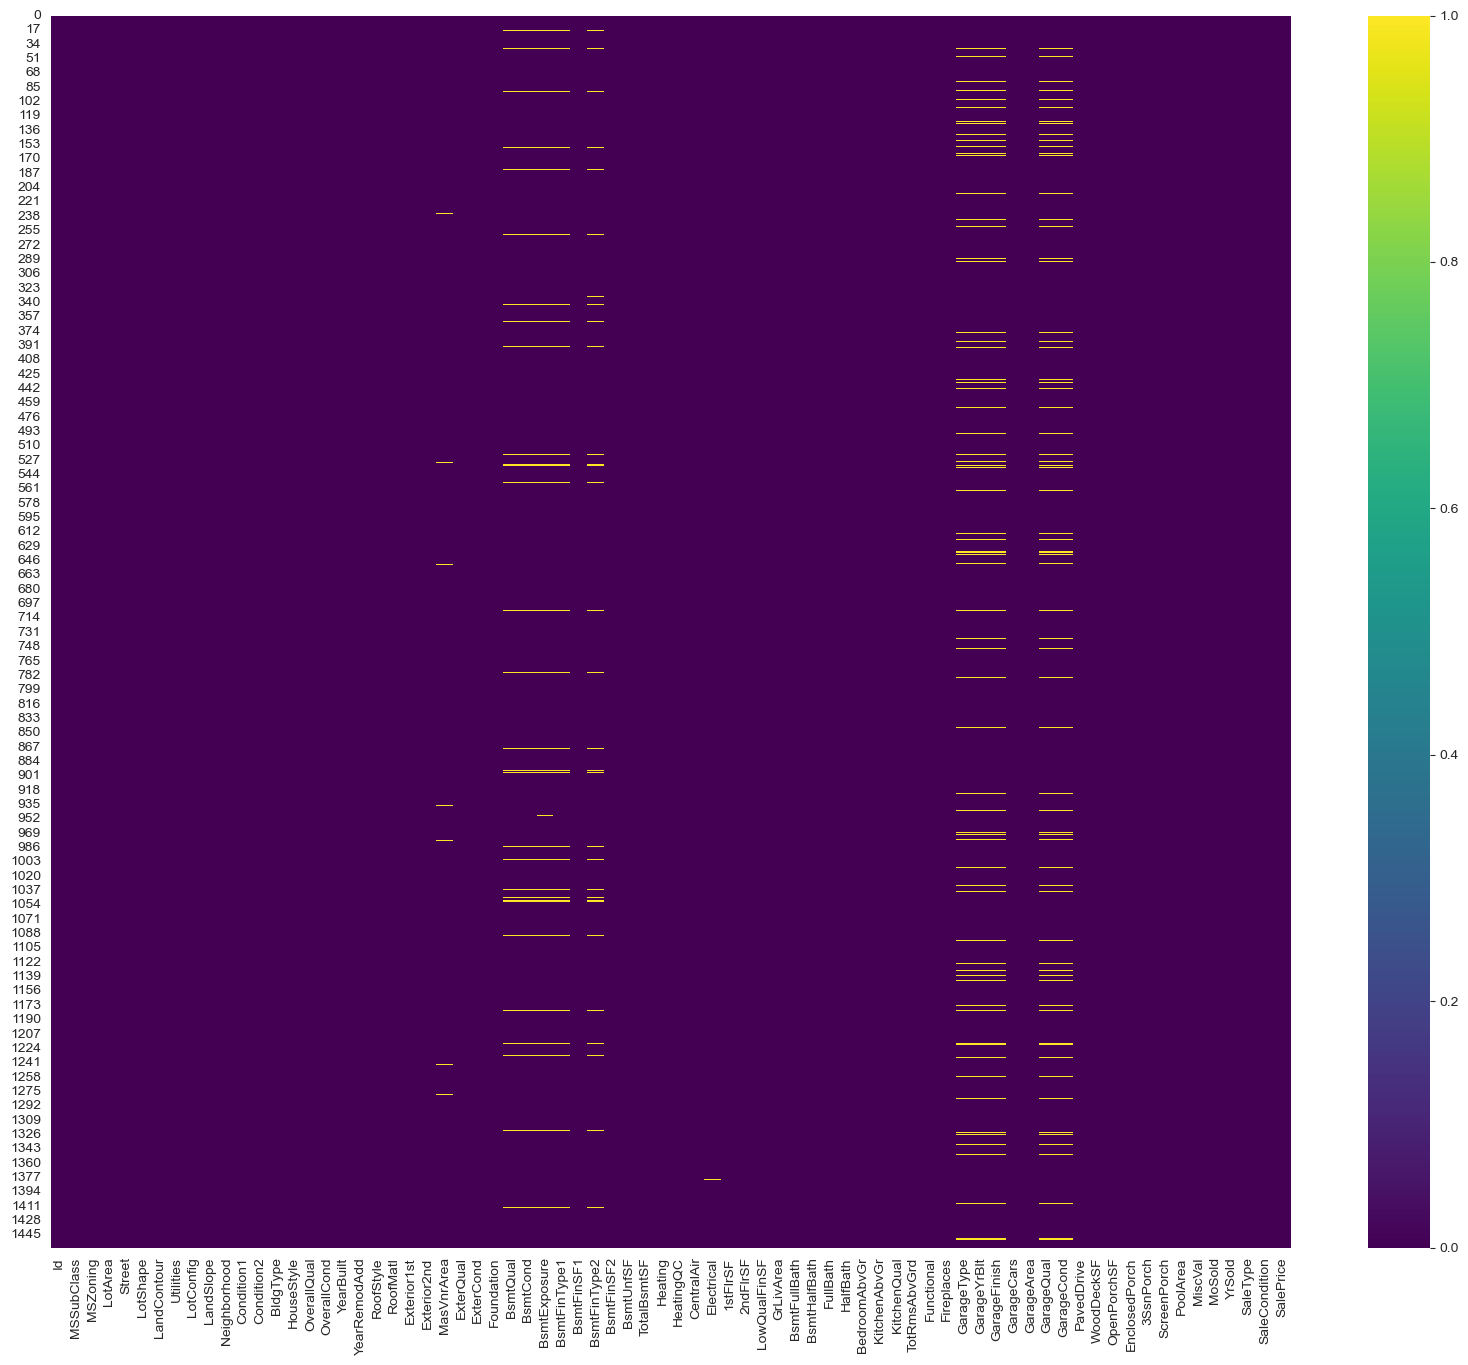

In [127]:
# 画图，热力图表示缺失值的分布
import seaborn as sns
# 对MSSubClassbuneng进行独热编码
X['MSSubClass'] = X['MSSubClass'].astype('object')
plt.figure(figsize=(20, 16))
sns.heatmap(df[notnull_count.index].isnull(), cmap='viridis')
# 画出纵轴叫标签编号
plt.show()

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train shape:', X_train.shape, 'X_test shape:', X_test.shape)

X_train shape: (1095, 72) X_test shape: (365, 72)


Id              1460
BsmtFullBath    1460
KitchenQual     1460
KitchenAbvGr    1460
BedroomAbvGr    1460
                ... 
GarageCond      1379
GarageQual      1379
GarageFinish    1379
GarageYrBlt     1379
GarageType      1379
Length: 74, dtype: int64
BsmtFinType2, BsmtExposure, GarageCond, GarageQual, GarageFinish, GarageYrBlt, GarageType


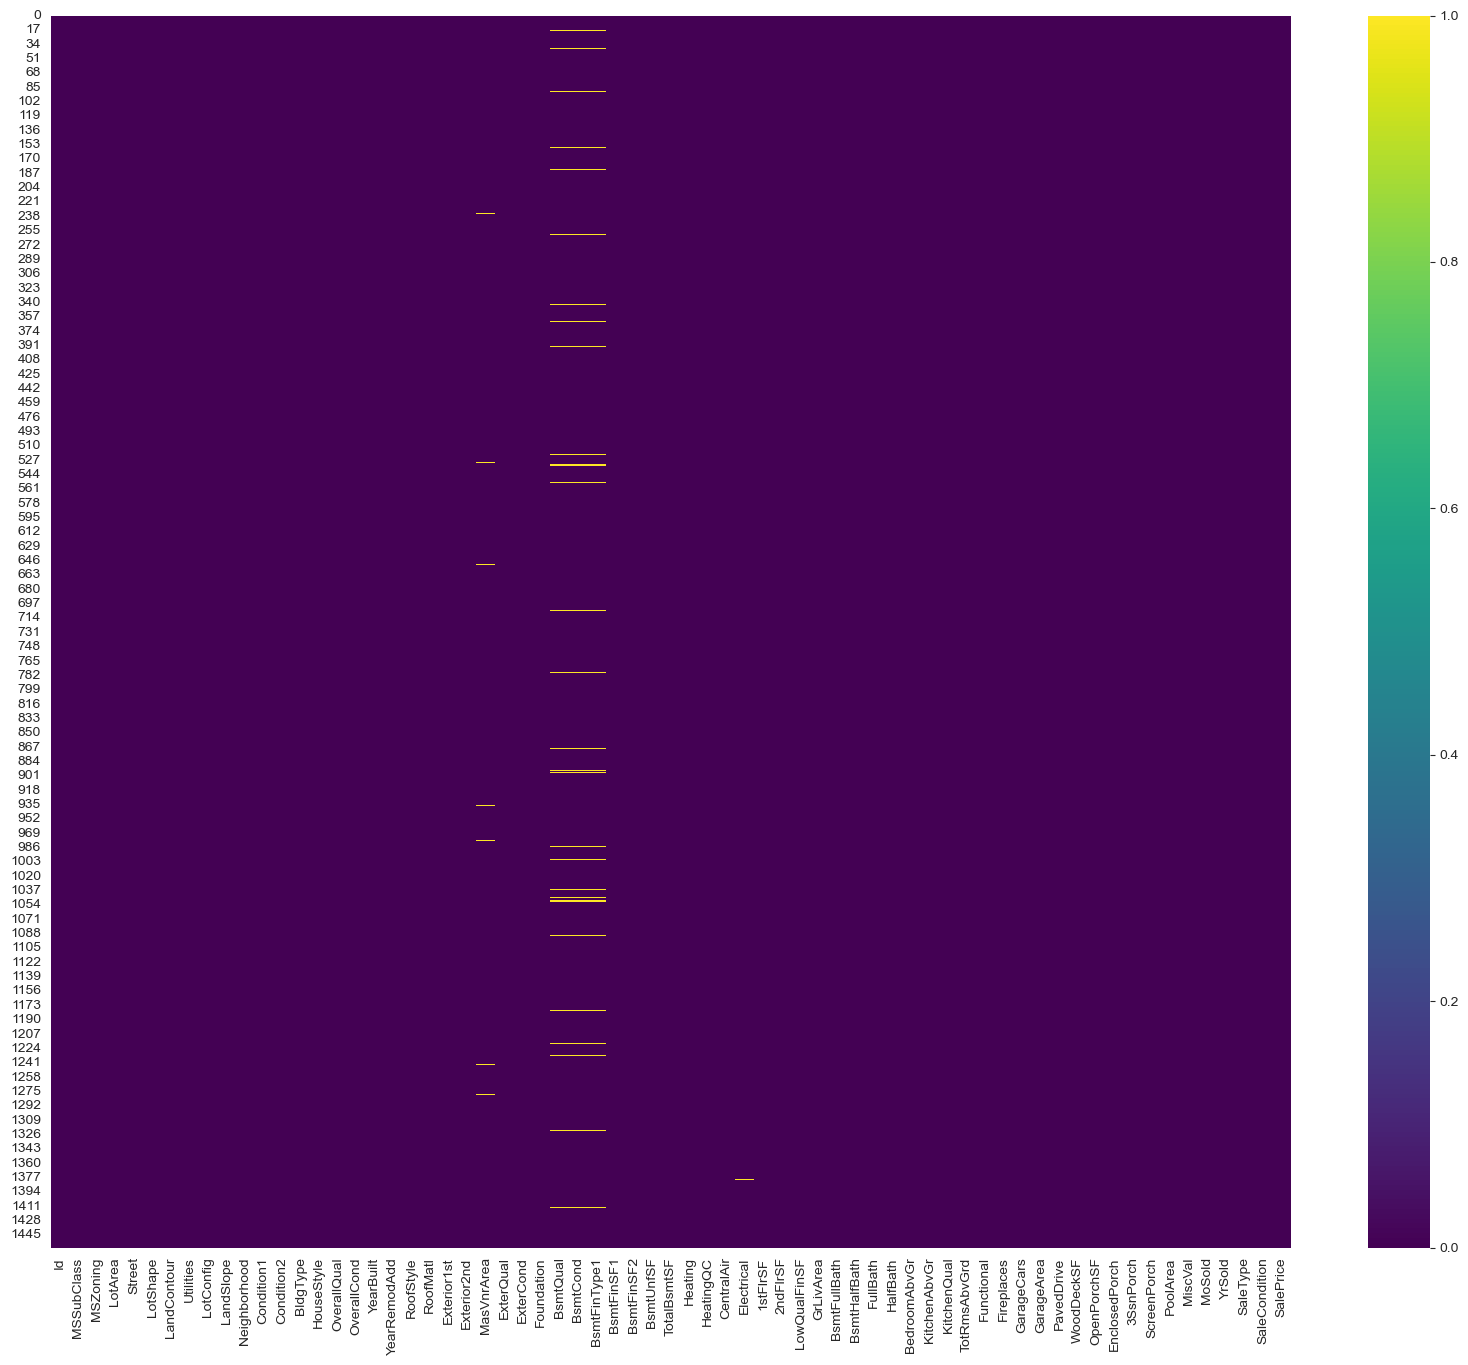

In [129]:

# 得到标签名和非空的值的个数
def get_notnull_count(df):
    notnull_count = df.count()
    notnull_count = notnull_count[notnull_count > 0]
    return notnull_count


notnull_count = get_notnull_count(df)
notnull_count = notnull_count.sort_values(ascending=False)
print(notnull_count)
print(', '.join(notnull_count.index[-7:].values.tolist()))
# 删除最后六个标签
df = df.drop(notnull_count.index[-7:], axis=1)
notnull_count = get_notnull_count(df)
# 画图，热力图表示缺失值的分布
import seaborn as sns

plt.figure(figsize=(20, 16))
sns.heatmap(df[notnull_count.index].isnull(), cmap='viridis')
# 画出纵轴叫标签编号
plt.show()


In [130]:
# Split the classifcation data and numerical data
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

In [131]:
# 选择数值型数据
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
# 选择分类数据
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [132]:
# 用中位数填充数值型数据，用众数填充分类数据
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [133]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))

MAE: 17523.464415667808


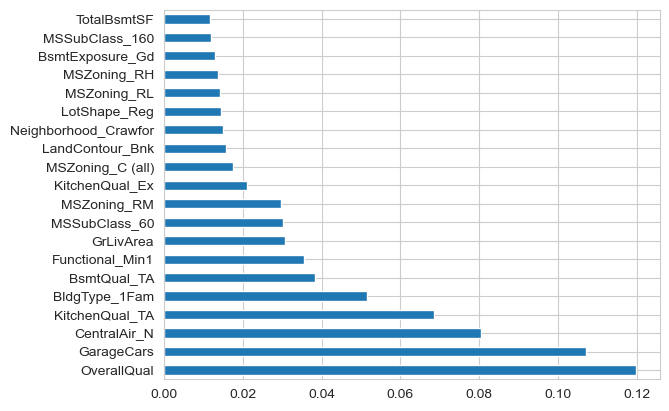

In [134]:
# 画出特征重要性
importances = my_pipeline.named_steps['model'].feature_importances_
features = numerical_cols.tolist() + my_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps[
    'onehot'].get_feature_names_out(categorical_cols).tolist()
importances = pd.Series(importances, index=features)
importances = importances.sort_values(ascending=False)
importances[:20].plot(kind='barh')
plt.show()                                                                                  

In [135]:
# 利用深度学习模型，Pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error


In [136]:
# 选择数值型数据
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
# 选择分类数据
categorical_cols = X_train.select_dtypes(include=['object']).columns


In [137]:
# 用中位数填充数值型数据，用众数填充分类数据
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [138]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(274, 1)

    def forward(self, x):
        x = self.fc1(x)
        return x

import numpy as np
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
X_t = preprocessor.fit_transform(X_train)
X_t = np.array(X_t.toarray())
_X_t = X_t.shape
print(_X_t)
train_loader = DataLoader(TensorDataset(torch.tensor(X_t.astype('float32')),
                                        torch.tensor(y_train.values.astype('float32'))), batch_size=32, shuffle=True)
print('y_train:', y_train.values.shape)

(1095, 274)
y_train: (1095,)


In [139]:
best_model = None
best_loss = 1000000000
for epoch in range(100):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        if loss.item() < best_loss:
            best_loss = loss.item()
            best_model = model
        loss.backward()
        optimizer.step()
    print('epoch:', epoch, 'loss:', loss.item())
print('best loss:', best_loss)


epoch: 0 loss: 19590166528.0
epoch: 1 loss: 20624521216.0
epoch: 2 loss: 25936545792.0
epoch: 3 loss: 33359151104.0
epoch: 4 loss: 35911757824.0
epoch: 5 loss: 25692084224.0
epoch: 6 loss: 41227534336.0
epoch: 7 loss: 27142873088.0
epoch: 8 loss: 25546852352.0
epoch: 9 loss: 39708291072.0


D:\Anaconda\envs\Experiment\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\envs\Experiment\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 10 loss: 41070006272.0
epoch: 11 loss: 38084313088.0
epoch: 12 loss: 29711341568.0
epoch: 13 loss: 29286703104.0
epoch: 14 loss: 46002094080.0
epoch: 15 loss: 31823554560.0
epoch: 16 loss: 58085007360.0
epoch: 17 loss: 33610678272.0
epoch: 18 loss: 32555145216.0
epoch: 19 loss: 33636931584.0
epoch: 20 loss: 26765551616.0
epoch: 21 loss: 52374032384.0
epoch: 22 loss: 25117028352.0
epoch: 23 loss: 25923151872.0
epoch: 24 loss: 70440501248.0
epoch: 25 loss: 54829166592.0
epoch: 26 loss: 46406074368.0
epoch: 27 loss: 40081367040.0
epoch: 28 loss: 35211063296.0
epoch: 29 loss: 42057728000.0
epoch: 30 loss: 53604999168.0
epoch: 31 loss: 72744017920.0
epoch: 32 loss: 35775434752.0
epoch: 33 loss: 20461926400.0
epoch: 34 loss: 16930226176.0
epoch: 35 loss: 44892880896.0
epoch: 36 loss: 45994930176.0
epoch: 37 loss: 30231777280.0
epoch: 38 loss: 41884667904.0
epoch: 39 loss: 37993893888.0
epoch: 40 loss: 31663970304.0
epoch: 41 loss: 25878016000.0
epoch: 42 loss: 33012432896.0
epoch: 43 

In [140]:
outputs = best_model(torch.tensor(preprocessor.transform(X_test).toarray().astype('float32')))
print('MAE:', mean_absolute_error(y_test, outputs.detach().numpy()))

TypeError: 'NoneType' object is not callable

In [ ]:
# Seanborn画图表示结果
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot([y_test, outputs.detach().numpy().reshape(-1).tolist()])
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()